<a href="https://colab.research.google.com/github/IrinaChen/Banking-Analytics-2020---Deep-Learning/blob/main/Coursework03Q3%20-%20Multinomial%20Deep%20Learning%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import h5py as h5py
import PIL

# Others
import numpy as np
from sklearn.model_selection import train_test_split

# For AUC estimation and ROC plots
from sklearn.metrics import roc_curve, auc

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Image and directories
import cv2
import os

**We have more than one image per area_number!**

#### Unstructured data 

In [ ]:
!gdown "https://drive.google.com/file/d/1Go7Kk1Una5ssoiSHYF70LR9Jrve2eS-Q/view?usp=sharing"

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=1Go7Kk1Una5ssoiSHYF70LR9Jrve2eS-Q
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/file/d/1Go7Kk1Una5ssoiSHYF70LR9Jrve2eS-Q/view?usp=sharing
To: /content/view?usp=sharing
70.5kB [00:00, 621kB/s]


In [ ]:
!unzip '/content/drive/My Drive/DataC3FM95282020.zip'

In [ ]:
# Import base model. Using VGG19.
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
model = VGG19(weights = 'imagenet',      # The weights from the ImageNet competition
              include_top = False,       # Do not include the top layer, which classifies.
              input_shape= (224, 224, 3) # Input shape. Three channels, and BGR (NOT RGB!!!)
             )

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow import keras

In [ ]:
# Create new model
ImageOnlyModel = Sequential()

# Copy the layers to our new model.
for layer in model.layers:
    ImageOnlyModel.add(layer)

# Set the layers as untrainable
for layer in ImageOnlyModel.layers:
    layer.trainable = False

# We now add the new layers for prediction.
ImageOnlyModel.add(Flatten(input_shape=model.output_shape[1:]))
ImageOnlyModel.add(Dense(64, activation = 'relu'))
ImageOnlyModel.add(Dropout(0.5))
ImageOnlyModel.add(Dense(64, activation = 'relu'))
ImageOnlyModel.add(Dropout(0.5))

# The output layer is relu
ImageOnlyModel.add(Dense(1, activation = 'sigmoid'))

# How does the model look like?
ImageOnlyModel.summary()

#### Structure data 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
!gdown "https://drive.google.com/file/d/1ylWhLR4uAXssaMQ9v4wxl2hBWYo4ArxT/view?usp=sharing"

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=1ylWhLR4uAXssaMQ9v4wxl2hBWYo4ArxT
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/file/d/1ylWhLR4uAXssaMQ9v4wxl2hBWYo4ArxT/view?usp=sharing
To: /content/view?usp=sharing
62.4kB [00:00, 10.0MB/s]


In [ ]:
import pandas as pd


data = pd.read_csv("/content/drive/My Drive/DefaultRiskperArea.csv")

In [ ]:
data.describe()

In [ ]:
data.head()

In [ ]:
# Classify train and test set
idx = pd.read_excel("/content/drive/My Drive/Index.xlsx")


In [ ]:
idx_list = idx["Index"].tolist()

In [ ]:
data["Indicator"] = None

In [ ]:
# Create an indicator column
for i in range(len(data)):
  if data["Area_Number"][i] in idx_list:
    data["Indicator"][i] = "Y" 
  else:
    data["Indicator"][i] = "N"

In [ ]:
test_data = data.iloc[np.where(data["Indicator"]=="Y")[0],:]
train_data = data.iloc[np.where(data["Indicator"]=="N")[0],:]

In [ ]:
data

,fico,mi_pct,cnt_units,cltv,ltv,cnt_borr,occpy_sts_S,channel_C,channel_T,prop_type_MH,prop_type_PU,loan_purpose_N,Area_Number,BinaryDefault,Indicator
0,1.815482,-2.997902,0.277646,-4.035187,-3.964115,-2.273682,0.148702,-1.594817,-0.035245,-0.501916,-0.949227,-0.493965,634.0,0,Y
1,-0.521829,-2.227060,3.498789,-1.810005,-1.772268,-0.171886,-0.751896,-0.865516,-0.035245,-0.501916,-0.199528,-0.816696,417.0,0,N
2,-0.457652,-2.095699,10.741067,-1.211170,-1.174970,-1.394290,-0.712228,0.155562,-0.035245,-0.501916,-0.934777,-0.587245,678.0,0,N
3,0.636380,-0.929451,0.754667,-0.616046,-0.606611,0.626942,-0.663063,-0.827111,-0.035245,-0.501916,-0.676832,-0.666799,490.0,1,N
4,0.324697,-0.815769,0.896132,-0.609527,-0.580298,0.523027,-0.809006,-0.996611,-0.035245,-0.501916,-0.897400,-0.793784,717.0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,-0.635748,-0.537949,-0.504865,-0.636134,-0.624775,1.024542,-0.623887,-1.239433,-0.035245,-0.501916,-0.811021,0.520058,743.0,0,Y
789,0.827999,0.685208,0.690687,0.211616,0.212083,-0.138212,-0.085434,-0.397011,-0.035245,-0.501916,0.017135,-0.821715,388.0,1,Y
790,-0.217318,0.191852,0.590651,0.014400,0.044998,0.129814,0.150415,-0.875257,-0.035245,-0.407222,-0.358295,-0.883066,397.0,0,N
791,0.165895,-0.935025,0.991450,-0.662455,-0.621446,0.419055,-0.192695,-0.897621,-0.035245,-0.501916,-0.916361,-0.881179,152.0,0,Y


In [ ]:
def getArea(filePath):
    return int(re.search('(?<=Area).*(?=_)',filePath).group(0))


import re
import glob
def combineFrames(path_0, path_1, bool_test):

    Default0_df = pd.DataFrame(path_0,columns = ["Path"])
    Default0_df['Default'] = 0 
    Default0_df['Area'] = Default0_df['Path'].apply(lambda x: int(re.search('(?<=Area).*(?=_)',x).group(0)))

    Default1_df = pd.DataFrame(path_1,columns = ["Path"])
    Default1_df['Default'] = 1
    Default1_df['Area'] = Default1_df['Path'].apply(lambda x: int(re.search('(?<=Area).*(?=_)',x).group(0)))

    combined = pd.concat([Default1_df,Default0_df])
    combined['TestSetFlag'] = bool_test

    return combined

In [ ]:
image_train = combineFrames(glob.glob(r'Data/train/0'  + "/*.jpg"),glob.glob(r'Data/train/1'  + "/*.jpg"),0)
image_test= combineFrames(glob.glob(r'Data/test/0'  + "/*.jpg"),glob.glob(r'Data/test/1'  + "/*.jpg"),1)

image_merged = pd.concat([image_train,image_test])

In [ ]:
image_train

In [ ]:
image_merged

In [ ]:
merged_data = image_merged.merge(data, how = 'left', left_on = 'Area', 
                                 right_on = 'Area_Number').drop(['Area','Default',"Indicator"], axis = 1)

In [ ]:
merged_data

In [ ]:
merged_data=merged_data.drop(['mi_pct','cltv','ltv','cnt_borr','prop_type_MH',
                              'prop_type_PU','loan_purpose_N'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# What are the continous variables?
continousCols = ['fico','cnt_units']

# Define scaler and train it over the train set.
Scaler = MinMaxScaler()
Scaler.fit(merged_data[continousCols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# Apply over sets. Ignore warning.
merged_data[continousCols] = Scaler.transform(merged_data[continousCols])

In [ ]:
merged_train=merged_data[merged_data.TestSetFlag==0]
merged_test=merged_data[merged_data.TestSetFlag==1]

In [ ]:
merged_train.columns

Index(['Path', 'TestSetFlag', 'fico', 'cnt_units', 'occpy_sts_S', 'channel_C',
       'channel_T', 'Area_Number', 'BinaryDefault'],
      dtype='object')

In [ ]:
#ImagePath = 'Data'
#data['path'] = [os.path.join(ImagePath, str(i) + '.jpg') for i in data["Area_Number"].values]
d#ata

In [ ]:
# Create a train / test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, 
                               test_size = 0.3,
                               random_state = 250747350)

Ready! We can now load the data. We have our set of pictures ready for this example. For this problem we will use a generator. A generator takes images from a directory, and feeds them to the model as needed. **This is necessary to work with big data**. We cannot expect the datasets we work here to fit in memory, so we take the images as needed.

We will first build two image generators (one for testing and one for training), which will generate new samples on the fly using our pictures as input.

We will also conduct **data augmentation**, which are a series of mathematical operations over the datasets to make them search more complex patterns. If you use augmentation, learning will take longer but be more robust. The process to work with this data is the following:

1. Create an [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) object which will process the images and load them as needed.

2. Call the ```flow_from_dataframe``` from our generator which will split the data into two parts, one for training and one for validation, and a third one for the test set.

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
import tensorflow as tf
import keras
ImageSize = (224,224)
image_input = tf.keras.Input(shape=ImageSize + (3,), name = 'image_input')

# Load an empty VGG
vgg_input = VGG19(weights='imagenet', include_top=False)

# Use the model API to attach it to our input layer.
ImageClassifier = vgg_input(image_input)

# Add a Flatten layer with the model API.
ImageClassifier = Flatten()(ImageClassifier)

# Now we create the structured data layer.
predictive_features = 5
features_input  = keras.Input(shape=(predictive_features,), name="structured_data") 
Structured =  Dense(64, activation = 'relu' )(features_input) # Add one processing layer
Structured =  Dropout(0.5)(Structured)   # Dropout after  Dense
Structured =  Dense(64, activation = 'relu' )(Structured)
Structured =  Dropout(0.5)(Structured)   # Dropout after  Dense

# Merge all available features into a single large vector via concatenation
merged = concatenate([ImageClassifier, Structured])

# Add a few prediction layers
merged = Dense(32, activation='relu')(merged)
merged = Dropout(0.1)(merged)

area_default = Dense(1, activation='sigmoid', name="area_default")(merged)

# Instantiate an end-to-end model predicting house_prices
multimodal_model = keras.Model(inputs=[image_input, features_input], 
                               outputs=[area_default])

In [ ]:
# Compile with same optimizer as before.
multimodal_model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adadelta(learning_rate=0.01)
              
              )

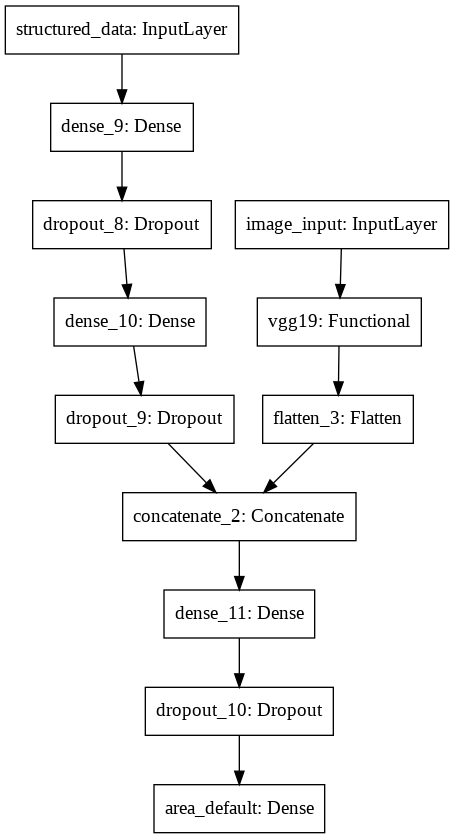

In [ ]:
import pydot as pyd
from tensorflow.keras.utils import plot_model

#Visualize Model
plot_model(
          multimodal_model, to_file='model.png', show_shapes=False, show_layer_names=True,
          rankdir='TB', expand_nested=False, dpi=96
          )

In [ ]:
from sklearn.utils import shuffle 
#Shuffle as flow from dataframe doesnt shuffle

merged_train = shuffle(merged_train)

In [ ]:
merged_train

In [ ]:
# prepare data augmentation configuration. One for train, one for test.
train_datagen = ImageDataGenerator(
                                  #rescale=1. / 255,                         # NNets like small inputs. Rescale.
                                  shear_range=0.2,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=True,                     # Flip horizontally?
                                  vertical_flip=True, 
                                  #fill_mode = "nearest",                     
                                  preprocessing_function=preprocess_input,  # VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0.2                    # Create a validation cut?
                                  )

test_datagen = ImageDataGenerator(
                                  #rescale=1. / 255,                       # NNets like small inputs. Rescale.
                                  shear_range=0,                          # Shear?
                                  zoom_range=0,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                  # Flip horizontally?
                                  vertical_flip=False,  
                                  #fill_mode = "nearest",
                                  preprocessing_function=preprocess_input,# VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0                    # No validation cut for test.
                                  )



batch_size = 8

# Train data generator. We point to the training directory!
train_data_dir = 'Data/train'

# VGG requires 224 x 224 images.
(img_height, img_width) = (224, 224)

train_generator = train_datagen.flow_from_directory(
                                                    train_data_dir,                      # Where are the pics
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='binary',            # Class mode, whether 'binary' or 'categorical'
                                                    subset = 'training',                 # What subset to use?
                                                    shuffle = True                       # Shuffle the data?
                                                    )

validation_generator = train_datagen.flow_from_directory(
                                                    train_data_dir,                      # Where are the pics
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='binary',            # Class mode, whether 'binary' or 'categorical'
                                                    subset = 'validation',               # What subset to use?
                                                    shuffle = True                       # Shuffle the data?
                                                    )

# Test data generator.
test_data_dir = 'Data/test'
test_generator = test_datagen.flow_from_directory(
                                                  test_data_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=1,
                                                  class_mode='binary',
                                                  shuffle = False
                                                  )

Found 3988 images belonging to 2 classes.
Found 996 images belonging to 2 classes.
Found 2142 images belonging to 2 classes.


In [ ]:
# Define parameters
target_size = (224, 224)
batch_size = 8 #32
DataDir = 'Data'

# What are the useful columns? Note the position of the target. 
pred_cols = np.r_[2:9]



# We only modify the generators. Note the y vector.
train_generator = train_datagen.flow_from_dataframe(merged_train,
                                                    directory='.',
                                                    x_col='Path',
                                                    y_col=merged_train.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='training',
                                                    interpolation="bilinear"
                                                   )
validation_generator = train_datagen.flow_from_dataframe(merged_train,
                                                    directory='.',
                                                    x_col='Path',
                                                    y_col=merged_train.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='validation',
                                                    interpolation="bilinear"
                                                   )
                                                   
test_generator = test_datagen.flow_from_dataframe(merged_test,
                                                    directory='.',
                                                    x_col='Path',
                                                    y_col=merged_test.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='raw',
                                                    interpolation="bilinear"
                                                   )

# Define combined generator
def train_generator_func():
    count = 0
    train_generator.reset()
    while True:
        if  count == len(merged_train.index):
            train_generator.reset()
            count==0
        count += 1
        data = train_generator.next()

        # Let's identify where is what.
        target_location = 6
        predictive_columns = np.r_[0:5]

        # Now we reshape everything. First the images.
        imgs = data[0]
        # Now we need to extract which ones are the predictive variables.
        cols = data[1][:, predictive_columns]
        # Finally we need the targets.
        targets = data[1][:, target_location]
        yield [imgs, cols], targets


def validation_generator_func():
    count = 0
    validation_generator.reset()
    while True:
        if count == len(merged_train.index):
            validation_generator.reset()
            count==0
        count += 1
        data = validation_generator.next()

        # Let's identify where is what.
        target_location = 6 
        predictive_columns = np.r_[0:5]

        # Now we reshape everything. First the images.
        imgs = data[0]
        # Now we need to extract which ones are the predictive variables.
        cols = data[1][:, predictive_columns]
        # Finally we need the targets.
        targets = data[1][:, target_location]
        yield [imgs, cols], targets
        
        
def test_generator_func():
    count = 0
    test_generator.reset()
    while True:
        if count == len(merged_test.index):
            test_generator.reset()
            count==0
        count += 1
        data = test_generator.next()

        # Let's identify where is what.
        target_location = 6
        predictive_columns = np.r_[0:5]

        # Now we reshape everything. First the images.
        imgs = data[0]
        # Now we need to extract which ones are the predictive variables.
        cols = data[1][:, predictive_columns]
        # Finally we need the targets.
        targets = data[1][:, target_location]
        yield [imgs, cols], targets

Found 3988 validated image filenames.
Found 996 validated image filenames.
Found 2142 validated image filenames.


In [ ]:
temp = validation_generator.next()

In [ ]:
temp[0]

In [ ]:
# This is how the data comes out now.
train_test_output = train_generator_func()
next(train_test_output)

In [ ]:
#steps_per_epoch = train_generator.samples // train_generator.batch_size
#validation_steps = validation_generator.samples // validation_generator.batch_size
steps_per_epoch  = 80
validation_steps = 20

multimodal_model.fit(train_generator_func(),
                      epochs=55,
                      steps_per_epoch=steps_per_epoch,
                      validation_data=validation_generator_func(),
                      validation_steps=validation_steps
                     )

In [ ]:
multimodal_model.save('drive/MyDrive/Q3.h5')

## Multimodal model

Now we can train a multi-input model. The idea of this model is to create two inputs, one with the images and the second one with the structured data. We need to first transform the zipcodes into a binary input and normalize the data though. The following code does the preprocessing of the data.

The model is better! This is the power of a multimodal learning strategy. It allows combining background knowledge (structured data) with unstructured data to reach combined outputs. Let's check the training plot and the testing error.

In [ ]:
loss = multimodal_model.history.history['loss']
val_loss = multimodal_model.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Calculate outputs in test set
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size


In [ ]:
test_generator.reset()
output = multimodal_model.predict(test_generator_func(),
                                    steps=STEP_SIZE_TEST+1,
                                    verbose=1)
output

In [ ]:
roc_auc_score(y_true = test_generator.labels[:,6], y_score = output)

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_generator.labels[:,6], output)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test_generator.labels[:,6], 
                             y_score = output),
              decimals = 2)

# Create and show the plot
plt.plot(fpr,tpr,label="logreg, auc="+str(auc))
plt.legend(loc=4)
plt.show()